# **Conjunto de dados Econômicos do Brasil** <p>
Dados da renda per capita dos estados da união <p>

link oficial dos dados: http://www.atlasbrasil.org.br/ <p>

**O que é Renda Per Capita?** <p>
A renda per capita é um dos indicadores socioeconômicos que avaliam o grau de desenvolvimento econômico de um determinado lugar. A média é obtida através da divisão do Produto Nacional Bruto (PNB) pelo número total de habitantes.

**Base de Dados para Download** <p>
[Download no Driver](https://docs.google.com/spreadsheets/d/1ieIQN3UjtkYwayuAusZAgvBdR-SXlL1L/edit?usp=sharing&ouid=101707831224147120634&rtpof=true&sd=true)

In [2]:
# Libs Necessárias

# Libs para Modelagem e Matrizes
import numpy as np
import pandas as pd

# Libs para análises gráficas
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

# Lib para ignorar avisos
import warnings

# Desabilitando avisos
warnings.filterwarnings('ignore')

In [4]:
# Lendo a base de dados
base_dados = pd.read_excel(r"C:\Users\Joao Paulo\OneDrive\Documents\Python_para_Analise_de_Dados_Data_Viking\Dados_Pib.xlsx", engine='openpyxl')
base_dados.head(10)

,Territorialidades,Ano,PIB per capita
0,Brasil,2013,22.20
1,Acre,2013,12.37
2,Alagoas,2013,9.45
3,Amapá,2013,14.53
4,Amazonas,2013,18.25
5,Bahia,2013,11.40
6,Ceará,2013,10.40
7,Distrito Federal,2013,52.77
8,Espírito Santo,2013,25.56
9,Goiás,2013,19.68


In [7]:
base_dados['Ano'].unique()

array([2013, 2014, 2015, 2016], dtype=int64)

In [10]:
base_dados.groupby(by=['Territorialidades', 'Ano']).mean()

PIB per capita
Territorialidades Ano                 
Acre              2013           12.37
                  2014           13.41
                  2015           12.24
                  2016           11.18
Alagoas           2013            9.45
...                                ...
São Paulo         2016           30.24
Tocantins         2013           13.47
                  2014           13.77
                  2015           13.79
                  2016           13.68

[112 rows x 1 columns]

## Sistema de grids:

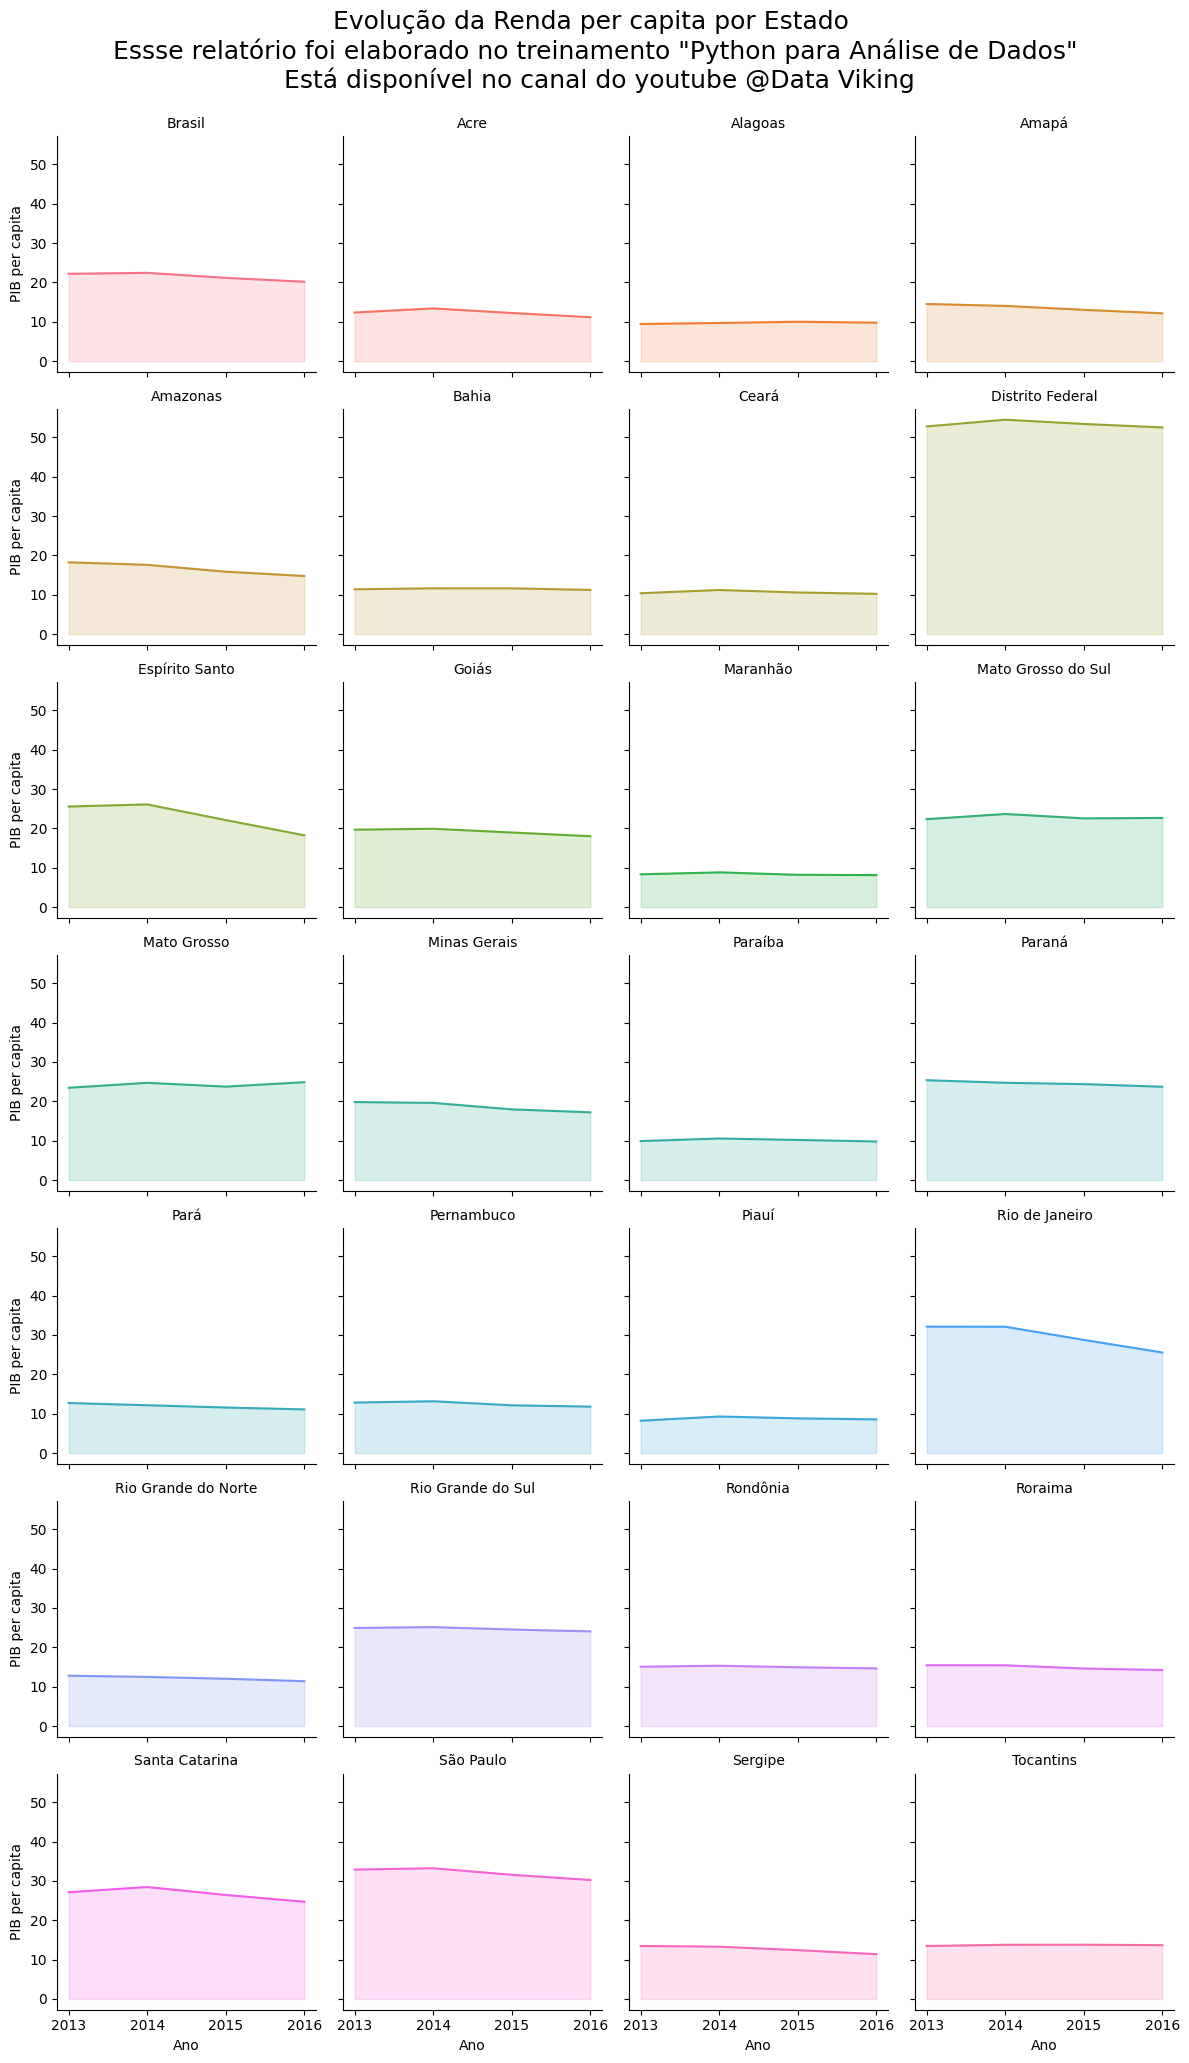

In [19]:
# Cor de fundo
cor_fundo = '#f5f5f5'

# Criar o sistema de grids:
grid_graficos = sns.FacetGrid(base_dados, col='Territorialidades', hue='Territorialidades', col_wrap=4)

# Adicionando um gráfico de linhas em cada subgráfico (em cada local do grid). O parâmetro "map" permite aplicar uma função.
grid_graficos = grid_graficos.map(plt.plot, 'Ano', 'PIB per capita')

# Adicionando uma sombra entre a linha e o final do gráfico
grid_graficos = grid_graficos.map(plt.fill_between, 'Ano', 'PIB per capita', alpha=0.2).set_titles('{col_name} Territorialidades')

# Retirando o "Territorialidades" do título dos gráficos
grid_graficos = grid_graficos.set_titles('{col_name}')

# Adicionando um subtítulo
grid_graficos = grid_graficos.fig.suptitle(
    'Evolução da Renda per capita por Estado \n Essse relatório foi elaborado no treinamento "Python para Análise de Dados" \n Está disponível no canal do youtube @Data Viking',
    fontsize=18
)

# Ajustando o posicionamento do título
plt.subplots_adjust(top=0.92)